# Auto-tagging Inference with essentia-tensorflow

In [1]:
import numpy as np
from essentia.standard import *
import matplotlib.pyplot as plt

In [2]:
# Labels and model are available in our repository
# https://essentia.upf.edu/models/autotagging/msd/
msd_labels = ['rock','pop','alternative','indie','electronic','female vocalists','dance','00s','alternative rock','jazz','beautiful','metal','chillout','male vocalists','classic rock','soul','indie rock','Mellow','electronica','80s','folk','90s','chill','instrumental','punk','oldies','blues','hard rock','ambient','acoustic','experimental','female vocalist','guitar','Hip-Hop','70s','party','country','easy listening','sexy','catchy','funk','electro','heavy metal','Progressive rock','60s','rnb','indie pop','sad','House','happy']

model_name = 'MSD_musicnn_frozen_small.pb'

# Our models take audio streams at 16kHz
sr = 16000

Text(0.5, 1.05, 'Predictions')

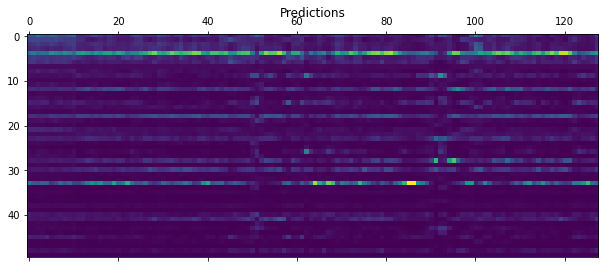

In [7]:
# Instantiate a MonoLoader and run it in the same line
audio = MonoLoader(filename='1 - Caucenus - Onã --16-441 TransitionMaster-01-11-19.mp3', sampleRate=sr)()

# Instatiate the tagger and pass it the audio
predictions = TensorflowPredictMusiCNN(graphFilename=model_name)(audio)

plt.matshow(predictions.T)
plt.title('Predictions')

In [4]:
# Retrieve the top_n tags
top_n = 3

# Take advantage of NumPy to average and sort the predictions
for i, l in enumerate(np.mean(predictions, axis=0).argsort()[-top_n:][::-1], 1):
    print('{}: {}'.format(i, msd_labels[l]))

1: electronic
2: Hip-Hop
3: electronica


# Feature extractor with essentia-tensorflow

In [5]:
penultimate_layer_name = 'model/dense_1/BiasAdd'

features = TensorflowPredictMusiCNN(graphFilename=model_name,
                                    output=penultimate_layer_name)(audio)

Text(0.5, 1.05, 'Penultimate Layer')

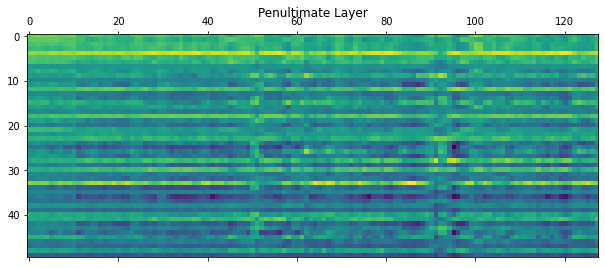

In [6]:
plt.matshow(features.T)
plt.title('Penultimate Layer')